# Time Series Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
milk = pd.read_csv('monthly-milk-production.csv', index_col='Month')

In [4]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [5]:
milk.index = pd.to_datetime(milk.index)

In [6]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


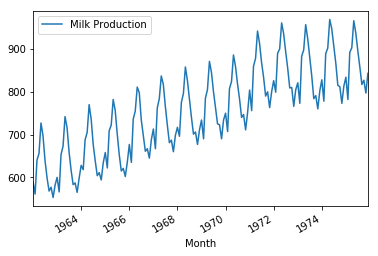

In [7]:
milk.plot()

## Splitting data into test and train

In [8]:
X_train = milk.head(156)
X_test = milk.tail(12)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1962-01-01 01:00:00 to 1974-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    156 non-null float64
dtypes: float64(1)
memory usage: 2.4 KB


In [10]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


## Scaling the data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaled_train = scaler.fit_transform(X_train)

In [14]:
scaled_test = scaler.transform(X_test)

## Batch Function

In [15]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
    rand_start = np.random.randint(0, len(training_data) - steps)
    
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    y_batch = np.array(training_data[rand_start: rand_start+steps+1]).reshape(1,steps+1)
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN to .reshape(-1,steps,1)
    return y_batch[:, :-1].reshape(-1,steps,1), y_batch[:, 1:].reshape(-1,steps,1)

## RNN Model

In [16]:
import tensorflow as tf

In [17]:
num_inputs = 1
num_time_steps = 12
num_neurons = 200
num_outputs = 1
learning_rate = 0.001
num_train_iterations = 6000
batch_size = 1

In [18]:
X = tf.placeholder(dtype=tf.float32, shape=[None, num_time_steps, num_inputs])
y = tf.placeholder(dtype=tf.float32, shape=[None, num_time_steps, num_outputs])

### RNN layer

In [19]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)

In [20]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

### Loss Function and Optimizer

In [21]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [22]:
#Global variable
init = tf.global_variables_initializer()

In [23]:
# Creating instance
saver = tf.train.Saver()

## Session

In [24]:
with tf.Session() as sess:
    # CODE HERE!
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(scaled_train, batch_size, num_time_steps)
        sess.run(train, feed_dict={X:X_batch, y:y_batch})
        
        if iteration%100 == 0:
        
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iteration, '\tMSE:', mse)

        
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0 	MSE: 0.4612812
100 	MSE: 0.06126389
200 	MSE: 0.013260323
300 	MSE: 0.013012829
400 	MSE: 0.011176355
500 	MSE: 0.0076130372
600 	MSE: 0.01047933
700 	MSE: 0.007118097
800 	MSE: 0.0059793345
900 	MSE: 0.006284013
1000 	MSE: 0.004800352
1100 	MSE: 0.008527519
1200 	MSE: 0.009039664
1300 	MSE: 0.0042760675
1400 	MSE: 0.008183193
1500 	MSE: 0.0066297906
1600 	MSE: 0.0068856752
1700 	MSE: 0.0029661644
1800 	MSE: 0.007638888
1900 	MSE: 0.0069773532
2000 	MSE: 0.004252197
2100 	MSE: 0.0063344943
2200 	MSE: 0.0053526293
2300 	MSE: 0.0039969333
2400 	MSE: 0.0051606814
2500 	MSE: 0.008623192
2600 	MSE: 0.0052571893
2700 	MSE: 0.0060950494
2800 	MSE: 0.004990849
2900 	MSE: 0.004425919
3000 	MSE: 0.008133261
3100 	MSE: 0.0037937548
3200 	MSE: 0.008286141
3300 	MSE: 0.0069365897
3400 	MSE: 0.0034716185
3500 	MSE: 0.0035774207
3600 	MSE: 0.004151059
3700 	MSE: 0.0032147812
3800 	MSE: 0.0029847955
3900 	MSE: 0.0038301193
4000 	MSE: 0.004078069
4100 	MSE: 0.0035961308
4200 	MSE: 0.0034704518
4300 

## Predicting test data

In [25]:
X_test

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


## Generative Session

In [26]:
with tf.Session() as sess:
    
    # Using Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")
    
    seed_training_instance = scaled_train[-12:]
    
    for i in range(12):
        X_batch = seed_training_instance[-12:].reshape(1,num_time_steps,1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        seed_training_instance = np.append(seed_training_instance,y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


### Result of the predictions

In [27]:
seed_training_instance

array([0.66105769, 0.54086538, 0.80769231, 0.83894231, 1.        ,
       0.94711538, 0.85336538, 0.75480769, 0.62980769, 0.62259615,
       0.52884615, 0.625     , 0.67650723, 0.59842253, 0.83666348,
       0.86280239, 1.00866067, 0.92492831, 0.81987047, 0.71403599,
       0.60241652, 0.59762597, 0.52019835, 0.62479758])

In [28]:
results = seed_training_instance[-12:].reshape(12,1)
result_unscaled = scaler.inverse_transform(np.array(results))

**Unscale data**

In [29]:
X_test['Generated'] = result_unscaled

In [30]:
X_test

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,834.427010
1975-02-01 01:00:00,782.0,801.943771
1975-03-01 01:00:00,892.0,901.052010
1975-04-01 01:00:00,903.0,911.925793
1975-05-01 01:00:00,966.0,972.602840
1975-06-01 01:00:00,937.0,937.770176
1975-07-01 01:00:00,896.0,894.066116
1975-08-01 01:00:00,858.0,850.038971
1975-09-01 01:00:00,817.0,803.605270


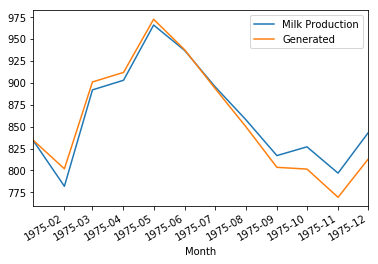

In [31]:
X_test.plot()